## Homework 07: Wiggins' Lost Labels
##### By: Kevin Liu

Since Wiggin's left the lab, we are once again tasked to troubleshoot one of his previous works involving differential gene expression analysis (DGEA). In this particular task, we know that Wiggins had isolated musant sand mouse in a screen and characterized the mutation's effect on the overall gene expression in an RNA-seq experiment. In this experiment, Wiggins did two sets of three replicates on wild type (WT) control mice and one set of three replicates on his mutant (MUT) sand mice.

We found that Wiggins used two of the three mapped count data files with three replicates for each type of sample, we will first try to identify the which combination of WT and MUT data files among the three data files Wiggins used are relevant to his experiment using the R script ```analyze_W.r``` he left in his file directory and the fact that he claims that he had identified 2147 differentially expressed genes significant at $P<0.05$. We will then futher explore his results to see if his results are trust worthy.

#### 1. Write a Python Function to Run an External edgeR Analysis

Before we begin our analysis, we will define a function ```edgeR()``` that takes the name of the input RNA-seq counts file as an argument and returns the output results of Wiggins' Rscript that uses edgeR analysis using our supplied data.

In [1]:
# dry run Wiggins' analyze_W.r script on the default dataset and inspect the output.
! Rscript analyze_W.r
! head myresult.out

Loading required package: limma
Using classic mode.
"logFC" "logCPM" "PValue" "FDR"
"rosemary" -7.32619183392224 9.95565499740577 6.21753215694757e-31 7.84006765521907e-27
"arugula" -7.34870217646736 10.2378265519338 7.82793435696577e-31 7.84006765521907e-27
"cauliflower" -7.16546627675304 10.7838709171475 5.99682973332141e-30 4.00408321293871e-26
"huckleberry" -7.09044181721207 10.833015925059 1.25422808997572e-29 6.28086071757593e-26
"parsley" -6.96498409531961 9.28733598575856 1.22117809191903e-28 4.89228367184601e-25
"watercress" -6.84227434662794 9.78561887581104 2.44350867901937e-28 8.07414798734537e-25
"watermelon" -6.86074375401555 13.7410327510667 2.82157834912973e-28 8.07414798734537e-25
"apricot" -6.74284512722796 7.4832235204375 3.88802997546056e-28 9.73514105480632e-25
"blackberry" -6.76944411094539 12.1481057336554 8.12595067386793e-28 1.80856575498054e-24


In [2]:
import os
import pandas as pd

def edgeR(filename):
    """
    Renames an input file to make compatible with R script, runs Wiggins' R script with edgeR, and reads in the output file.
    Returns edgeR output as a PANDAS dataframe.
    """
    os.rename(filename, "mydata.tbl")
    ! Rscript analyze_W.r
    out_df = pd.read_table('myresult.out', sep = " ", header = 0)
    return out_df

To test out our ```edgeR()``` function, we will join the ```w07-data.1``` and ```w07-data.2``` data tables to create the joined data table ```merged.12``` and then inspect the output after running Wiggin's edgeR script with our defined function.

In [3]:
# join data tables w07-data.1 and w07-data.2 and runs Wiggins' R script on the joined file merged.12
! join -t $'\t' w07-data.1 w07-data.2 > merged.12
edgeR('merged.12')

Loading required package: limma
Using classic mode.


,logFC,logCPM,PValue,FDR
huckleberry,7.707685,10.829353,4.465235e-34,8.944312e-30
watercress,7.312414,9.782148,1.896153e-32,1.899092e-28
chestnut,7.506817,7.867870,3.059913e-31,1.828872e-27
rosemary,7.375350,9.955355,3.652083e-31,1.828872e-27
cauliflower,6.924342,10.785685,7.079227e-30,2.836080e-26
...,...,...,...,...
PRRG2,0.000034,6.777514,1.000000e+00,1.000000e+00
HS3ST2,-0.000005,3.980425,1.000000e+00,1.000000e+00
EXT2,0.000000,-4.895947,1.000000e+00,1.000000e+00
CCDC153,0.000000,-4.895947,1.000000e+00,1.000000e+00


Based on the above output, we see that our ```edgeR()``` function works as expected as it returned the edgeR results using our supplied data.

#### 2. Reproduce Wiggins' Data, Assign the Missing Labels

As previously discussed, we know that Wiggins used two of the three data files as input to his R script to identify 2147 differentially expressed genes significant at $P<0.05$. Here, we will try to test each combination of two data files among all three files on his R script to determine which of the three files correspond to the mutant sand mouse samples by merging the files into the following combinations:
- ```w07-data.1``` and ```w07-data.2``` into the merged file ```merged.12```.
- ```w07-data.1``` and ```w07-data.3``` into the merged file ```merged.13```.
- ```w07-data.2``` and ```w07-data.3``` into the merged file ```merged.23```.

We will then filter each of the R script outputs by the ```PValue``` column to keep only the rows that have $P<0.05$ to see how many differentially expressed genes were identified by edgeR based on the criterion of $P<0.05$ and then see which combination of results yielded Wiggins' stated number of 2147 differentially expressed genes to determine which file corresponds to the mutant sand mouse samples.

In addition, we will write an R script and an associated python function that generates multidimensional scaling (MDS) plots to visually verify our conclusions based on the level of similarity between our merged datasets.

In [4]:
# write an R script that plots the MDS plots.
lines = ['library(edgeR)', 
         'x = read.table("mydata.tbl", sep = "\t", row.names = 1)',
         'y = calcNormFactors(DGEList(counts = x, group = factor(c(1, 1, 1, 2, 2, 2))))',
         'jpeg(file = "mds.jpeg")',
         'plotMDS(y, method = "bcv", col = as.numeric(y$samples$group))',
         'dev.off()']
with open('plotMDS.r', 'w') as f:
    for line in lines:
        f.write(line)
        f.write('\n')

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plotMDS(filename):
    """
    Renames an input file to make compatible with R script, runs our R script that generates the MDS plot, reads in the generated mds.jpeg plot, and shows the MDS plot.
    """
    os.rename(filename, "mydata.tbl")
    ! Rscript plotMDS.r
    mds_plot = mpimg.imread('mds.jpeg')
    imgplot = plt.imshow(mds_plot)
    plt.show()

Loading required package: limma
Using classic mode.
Loading required package: limma
Using classic mode.
Loading required package: limma
Using classic mode.
Merged files from w07-data.1 and w07-data.2 yielded 2147 differentially expressed genes based on p < 0.05.
Loading required package: limma
Note: the bcv method is now scheduled to be removed in a future release of edgeR.
null device 
          1 


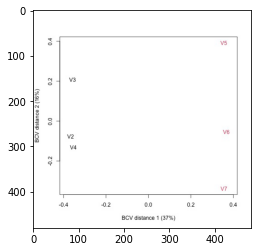

Merged files from w07-data.1 and w07-data.3 yielded 986 differentially expressed genes based on p < 0.05.
Loading required package: limma
Note: the bcv method is now scheduled to be removed in a future release of edgeR.
null device 
          1 


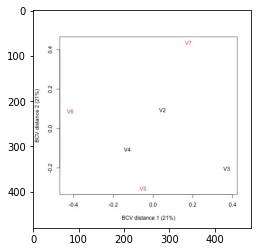

Merged files from w07-data.2 and w07-data.3 yielded 2136 differentially expressed genes based on p < 0.05.
Loading required package: limma
Note: the bcv method is now scheduled to be removed in a future release of edgeR.
null device 
          1 


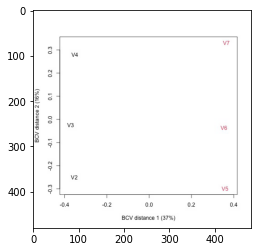

In [6]:
# merge all combinations of RNA-seq counts to their respective combined files for testing.
! join -t $'\t' w07-data.1 w07-data.2 > merged.12
! join -t $'\t' w07-data.1 w07-data.3 > merged.13
! join -t $'\t' w07-data.2 w07-data.3 > merged.23

# run the merged files with Wiggins' R script and store each of the results in their respective dataframes.
out12 = edgeR("merged.12")
out13 = edgeR("merged.13")
out23 = edgeR("merged.23")

# filter each output to keep only rows with p-value < 0.05 and get the number of remaining rows.
out12_filt_len = len(out12[out12['PValue'] < 0.05])
out13_filt_len = len(out13[out13['PValue'] < 0.05])
out23_filt_len = len(out23[out23['PValue'] < 0.05])

print('Merged files from w07-data.1 and w07-data.2 yielded ' + str(out12_filt_len) + ' differentially expressed genes based on p < 0.05.')
! join -t $'\t' w07-data.1 w07-data.2 > merged.12
plotMDS("merged.12")

print('Merged files from w07-data.1 and w07-data.3 yielded ' + str(out13_filt_len) + ' differentially expressed genes based on p < 0.05.')
! join -t $'\t' w07-data.1 w07-data.3 > merged.13
plotMDS("merged.13")

print('Merged files from w07-data.2 and w07-data.3 yielded ' + str(out23_filt_len) + ' differentially expressed genes based on p < 0.05.')
! join -t $'\t' w07-data.2 w07-data.3 > merged.23
plotMDS("merged.23")

Based on the above results, we see that the merged file from ```w07-data.1``` and ```w07-data.2``` yielded Wiggins' claimed 2147 differentially expressed genes based on $P<0.05$, which is most likely the two datasets Wiggins used in his analysis; this is supported by our MDS plot, as the two datasets are visually separated into two distinct columns, suggesting that the two datasets are distinct from each other.

We further observe that ```w07-data.1``` and ```w07-data.3``` yielded only 986 differentially expressed genes based on $P<0.05$, which is the smallest number of differentially expressed genes, suggesting that these two datasets are very similar and are therefore most likely the two WT datasets; our MDS plot also supports this claim, as the data points displayed on the MDS plot are mixed together with no apparent patterns of separation between the two datasets.

Given the above findings, it is most likely that the ```w07-data.2``` file corresponds to the mutant sand mouse samples.

#### 3. Wiggins Doesn't Understand p-values

Wiggins' conclusion that 2147 genes are differentially expressed in WT vs. MUT comparisons is based on a p-value significance cutoff of $P<0.05$. However, he failed to consider the problem of multiple hypothesis testing in DGEA, where we are performing a very large number of comparisons rather than a single comparison under a single hypothesis. Therefore, some multiple hypothesis testing-adjustment procedure must be performed to control for the number of false positives that may arise due to chance.

Here, using edgeR's false discovery rate (FDR)-adjusted values will be more appropriate to control for the problem of multiplicity. Thus, we can consider using an FDR-based significance threshold of $FDR<0.05$ to control for the issue of multiplicity and identify our differentially expressed genes.

In [7]:
# filter each output to keep only rows with FDR < 0.05 and get the number of remaining rows.
out12_filt_len_fdr = len(out12[out12['FDR'] < 0.05])
out13_filt_len_fdr = len(out13[out13['FDR'] < 0.05])
out23_filt_len_fdr = len(out23[out23['FDR'] < 0.05])

print('Merged files from w07-data.1 and w07-data.2 yielded ' + str(out12_filt_len_fdr) + ' differentially expressed genes based on FDR < 0.05.')
print('Merged files from w07-data.1 and w07-data.3 yielded ' + str(out13_filt_len_fdr) + ' differentially expressed genes based on FDR < 0.05.')
print('Merged files from w07-data.2 and w07-data.3 yielded ' + str(out23_filt_len_fdr) + ' differentially expressed genes based on FDR < 0.05.')

Merged files from w07-data.1 and w07-data.2 yielded 75 differentially expressed genes based on FDR < 0.05.
Merged files from w07-data.1 and w07-data.3 yielded 0 differentially expressed genes based on FDR < 0.05.
Merged files from w07-data.2 and w07-data.3 yielded 68 differentially expressed genes based on FDR < 0.05.


After applying an FDR-based significance cutoff of FDR < 0.05, we can see that 75 genes were determined to be significantly differentially expressed using the same dataset that Wiggins used (i.e., the merged file based on ```w07-data.1``` and ```w07-data.2```).

We also observe that, by using an FDR-based significance cutoff, the results based on comparing the two WT datasets (i.e., the merged file based on ```w07-data.1``` and ```w07-data.3```) yielded no significant differentially expressed genes, which is consistent with our expectations since both datasets are of WT sand mouse genes with three replicates each.

Furthermore, we see that by comparing the MUT sand mouse gene expression values against the other WT dataset (i.e., ```w07-data.3```), 68 genes were determined to be differentially expressed, which is expectedly similar in numbers to the results based on the ```w07-data.1``` and ```w07-data.2``` datasets.

#### 4. Wiggins Missed Something Else Too

After carefully inspecting Wiggins' R script, we notice a few issues with the main one being that Wiggins forgot to normalize the RNA-seq data using the trimmed mean of M values (TMM). The TMM normalization step is necessary here because the gene expression relative abundances are not entirely independent, such that the expression of one gene may depend on the expression of other genes. The utilization of the TMM normalization procedure is further justified as it accounts for library size variations between samples and assumes that the majority of genes shared between two samples are not differentially expressed, which allows us to estimate the scaled factors between samples to reduce the number of detected significantly differentially expressed genes.

Aside from the lack of TMM normalization in Wiggins' R script, he also did not remove genes with low counts, which may introduce false positives in our results as these genes with low expression levels might be an artifact from sequencing.

Due to the reasons described here, we will write a revised R script based on Wiggins' R script that removes genes with counts lower than 100CPM (counts per million mapped reads) in at least 2 samples and add the TMM normalization step to the analysis pipeline. We will then define a new Python function and run our new R script using the same merged datasets as shown previously and re-determine the number of significantly differentially expressed genes based on a significance cutoff of $FDR<0.05$.

In [8]:
# write an R script that uses edgeR to perform DGEA that fixes Wiggins' R script's problems.
lines = ['library(edgeR)',
         'x = read.table("mydata.tbl", sep = "\t", row.names = 1)',
         'y = DGEList(counts = x, group = factor(c(1, 1, 1, 2, 2, 2)))',
         'y = y[rowSums(cpm(y)>=100)>=2,]', # keep rows with at least 100 counts in at least 2 conditions.
         'y = calcNormFactors(y)', # perform TMM normalization.
         'y = estimateDisp(y)', 
         'et = exactTest(y)', 
         'tab = topTags(et, nrow(x))',
         'write.table(tab, file = "myresult.out")']
with open('analyze_K.r', 'w') as f:
    for line in lines:
        f.write(line)
        f.write('\n')

In [9]:
def edgeR_filt_norm(filename):
    """
    Renames an input file to make compatible with R script, runs our new R script with edgeR, and reads in the output file.
    Returns edgeR output as a PANDAS dataframe.
    """
    os.rename(filename, "mydata.tbl")
    ! Rscript analyze_K.r
    out_df = pd.read_table('myresult.out', sep = " ", header = 0)
    return out_df

In [10]:
# merge all combinations of RNA-seq counts to their respective combined files for testing.
! join -t $'\t' w07-data.1 w07-data.2 > merged.12
! join -t $'\t' w07-data.1 w07-data.3 > merged.13
! join -t $'\t' w07-data.2 w07-data.3 > merged.23

# run the merged files with our new R script and store each of the results in their respective dataframes.
out12_filt_norm = edgeR_filt_norm("merged.12")
out13_filt_norm = edgeR_filt_norm("merged.13")
out23_filt_norm = edgeR_filt_norm("merged.23")

# filter each output to keep only rows with FDR < 0.05 and get the number of remaining rows.
out12_filt_norm_len = len(out12_filt_norm[out12_filt_norm['FDR'] < 0.05])
out13_filt_norm_len = len(out13_filt_norm[out13_filt_norm['FDR'] < 0.05])
out23_filt_norm_len = len(out23_filt_norm[out23_filt_norm['FDR'] < 0.05])

print('Merged files from w07-data.1 and w07-data.2 yielded ' + str(out12_filt_norm_len) + ' differentially expressed genes based on FDR < 0.05.')
print('Merged files from w07-data.1 and w07-data.3 yielded ' + str(out13_filt_norm_len) + ' differentially expressed genes based on FDR < 0.05.')
print('Merged files from w07-data.2 and w07-data.3 yielded ' + str(out23_filt_norm_len) + ' differentially expressed genes based on FDR < 0.05.')

Loading required package: limma
Using classic mode.
Loading required package: limma
Using classic mode.
Loading required package: limma
Using classic mode.
Merged files from w07-data.1 and w07-data.2 yielded 51 differentially expressed genes based on FDR < 0.05.
Merged files from w07-data.1 and w07-data.3 yielded 0 differentially expressed genes based on FDR < 0.05.
Merged files from w07-data.2 and w07-data.3 yielded 48 differentially expressed genes based on FDR < 0.05.


After running our new R script that filters out genes with counts lower than 100CPM and performs TMM normalization, we find that only 51 genes are differentially expressed in the dataset that Wiggins originally analyzed by applying a significance threshold of $FDR<0.05$.

Since we know that ```w07-data.3``` is also a WT dataset of three replicates, these results should be equally informative as the results we obtain based on ```w07-data.1``` when performing comparisons against the MUT dataset ```w07-data.2```. Therefore, we can find the intersection between the results obtained from these two analyses and determine, with high confidence, the genes that are truely differentially expressed between WT and MUT sand mouse genes, which are listed below.

In [12]:
# find the intersection of identified differentially expressed genes between the two analyses.
dgea_genes = list(out12_filt_norm[out12_filt_norm['FDR'] < 0.05].index.intersection(out23_filt_norm[out23_filt_norm['FDR'] < 0.05].index)
)

print('The differentially expressed genes identified in both analyses include: ' + ', '.join(dgea_genes) + ' for a total of ' + str(len(dgea_genes)) + ' genes.')

The differentially expressed genes identified in both analyses include: huckleberry, rosemary, chestnut, watercress, watermelon, blackberry, cauliflower, quince, strawberry, parsley, cranberry, fennel, grape, raisin, arugula, coconut, elderberry, orange, turnip, olive, fig, mango, papaya, mustard, basil, currant, lentil, apricot, peach, blueberry, wasabi, lettuce, rhubarb, okra, grapefruit, clementine, onion, mushroom, pomegranate, tomato, chard, avocado, banana, kohlrabi, raspberry, asparagus, eggplant, parsnip for a total of 48 genes.
